Question 1

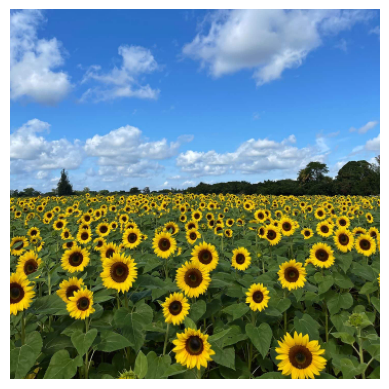

In [2]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
im = cv.imread('the_berry_farms_sunflower_field.jpeg', cv.IMREAD_REDUCED_COLOR_4)
# Check if image is loaded fine
if im is None:
    print('Error opening image!')
    exit(0)
plt.imshow(cv.cvtColor(im, cv.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

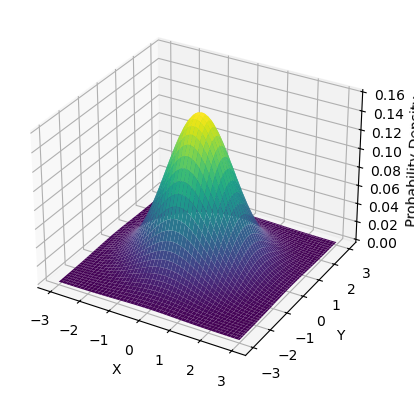

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Create grid
x = np.linspace(-3, 3, 100)
y = np.linspace(-3, 3, 100)
X, Y = np.meshgrid(x, y)

# 2D Gaussian formula (height = probability density)
Z = np.exp(-(X**2 + Y**2) / 2) / (2 * np.pi)

# Plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Probability Density')
plt.show()



The **Laplacian of Gaussian (LoG)** combines Gaussian smoothing and the Laplacian operator. Its formula is:

[
\text{LoG}(x, y) = \frac{\partial^2}{\partial x^2}G(x, y) + \frac{\partial^2}{\partial y^2}G(x, y)
]

Where the **Gaussian** is:
[
G(x, y) = \frac{1}{2\pi\sigma^2} e^{-\frac{x^2 + y^2}{2\sigma^2}}
]

Substituting and simplifying gives the full LoG expression:

[
\boxed{
\text{LoG}(x, y) = \frac{1}{\pi\sigma^4}
\left(1 - \frac{x^2 + y^2}{2\sigma^2}\right)
e^{-\frac{x^2 + y^2}{2\sigma^2}}
}
]

**Intuitive idea:**
It first smooths the image with a Gaussian (removing noise), then applies the Laplacian (second derivative) to find regions where intensity changes rapidly — i.e., **edges or blobs**.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Parameters
sigma = 2
x = np.linspace(10, 10, 6*sigma)
y = np.linspace(-3*sigma, 3*sigma, 6*sigma)
X, Y = np.meshgrid(x, y)

# Laplacian of Gaussian formula
LoG = (1 / (np.pi * sigma**4)) * (1 - ((X**2 + Y**2) / (2 * sigma**2))) * np.exp(-(X**2 + Y**2) / (2 * sigma**2))

# Plot
# fig = plt.figure(figsize=(7, 5))
# ax = fig.add_subplot(111, projection='3d')
# ax.plot_surface(X, Y, LoG, cmap='viridis')

# ax.set_title("Laplacian of Gaussian (LoG)")
# ax.set_xlabel("X")
# ax.set_ylabel("Y")
# ax.set_zlabel("LoG Value")

# plt.show()


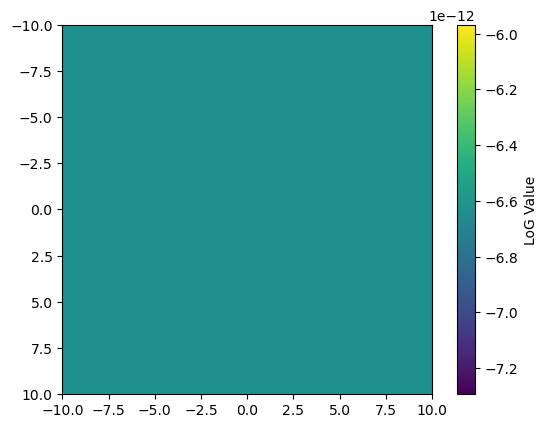

In [62]:
# visualize LoG in 2D
plt.imshow(LoG, extent=(-10, 10, 10, -10))
plt.colorbar(label='LoG Value')

(-0.5, 359.5, 359.5, -0.5)

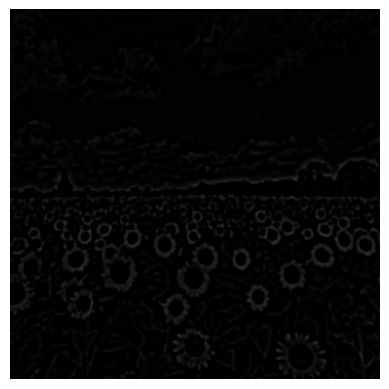

In [54]:
im_gray=cv.cvtColor(im, cv.COLOR_BGR2GRAY)
LoG_kernel = LoG / np.sum(np.abs(LoG))  # Normalize kernel  to ensure sum is 1
# Convolve the image with the LoG kernel
LoG_image = cv.filter2D(im_gray, -1, LoG_kernel) # -1 means output image has same depth as input image
plt.imshow(cv.cvtColor(LoG_image, cv.COLOR_BGR2RGB))
plt.axis('off') 